# **Data input**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
df15=(pd.read_csv("2015.csv").drop(columns=["Standard Error","Dystopia Residual","Region"])
.rename(columns={"Economy (GDP per Capita)": "GDP",
                     "Health (Life Expectancy)": "Life",
                     "Trust (Government Corruption)": "Trust"}))



In [ ]:
df15.insert(2,"Year",2015)

In [ ]:
df16 = (pd.read_csv("2016.csv").drop(columns=["Lower Confidence Interval","Upper Confidence Interval","Dystopia Residual","Region"])
.rename(columns={"Economy (GDP per Capita)": "GDP",
                     "Health (Life Expectancy)": "Life",
                     "Trust (Government Corruption)": "Trust"}))



In [ ]:
df16.insert(2,"Year",2016)

In [ ]:
df17 = (pd.read_csv("2017.csv").drop(columns=["Whisker.high","Whisker.low","Dystopia.Residual"])
.rename(columns={"Happiness.Rank": "Happiness Rank",
                 "Happiness.Score": "Happiness Score",
                 "Economy..GDP.per.Capita.": "GDP",
                     "Health..Life.Expectancy.": "Life",
                     "Trust..Government.Corruption.": "Trust"}))


In [ ]:
df17.insert(2,"Year",2017)

In [ ]:
df18 = (pd.read_csv("2018.csv").rename(columns={"Overall rank": "Happiness Rank",
                                               "Country or region": "Country",
                                               "Score": "Happiness Score",
                                               "GDP per capita": "GDP",
                                               "Social support": "Family",
                                               "Healthy life expectancy": "Life",
                                               "Freedom to make life choices": "Freedom",
                                               "Perceptions of corruption": "Trust"}))


In [ ]:
df18.insert(2,"Year",2018)

In [ ]:
df19 = (pd.read_csv("2019.csv").rename(columns={"Overall rank": "Happiness Rank",
                                               "Country or region": "Country",
                                               "Score": "Happiness Score",
                                               "GDP per capita": "GDP",
                                               "Social support": "Family",
                                               "Healthy life expectancy": "Life",
                                               "Freedom to make life choices": "Freedom",
                                               "Perceptions of corruption": "Trust"}))

In [ ]:
df19.insert(2,"Year",2019)

In [ ]:
df17.head()

Country  Happiness Rank  Year  ...   Freedom  Generosity     Trust
0       Norway               1  2017  ...  0.635423    0.362012  0.315964
1      Denmark               2  2017  ...  0.626007    0.355280  0.400770
2      Iceland               3  2017  ...  0.627163    0.475540  0.153527
3  Switzerland               4  2017  ...  0.620071    0.290549  0.367007
4      Finland               5  2017  ...  0.617951    0.245483  0.382612

[5 rows x 10 columns]

In [ ]:
df17.head()

Country  Happiness Rank  Year  ...   Freedom  Generosity     Trust
0       Norway               1  2017  ...  0.635423    0.362012  0.315964
1      Denmark               2  2017  ...  0.626007    0.355280  0.400770
2      Iceland               3  2017  ...  0.627163    0.475540  0.153527
3  Switzerland               4  2017  ...  0.620071    0.290549  0.367007
4      Finland               5  2017  ...  0.617951    0.245483  0.382612

[5 rows x 10 columns]

In [ ]:
df18.head()

Happiness Rank      Country  Year  ...  Freedom  Generosity  Trust
0               1      Finland  2018  ...    0.681       0.202  0.393
1               2       Norway  2018  ...    0.686       0.286  0.340
2               3      Denmark  2018  ...    0.683       0.284  0.408
3               4      Iceland  2018  ...    0.677       0.353  0.138
4               5  Switzerland  2018  ...    0.660       0.256  0.357

[5 rows x 10 columns]

In [ ]:
df19.head()

Happiness Rank      Country  Year  ...  Freedom  Generosity  Trust
0               1      Finland  2019  ...    0.596       0.153  0.393
1               2      Denmark  2019  ...    0.592       0.252  0.410
2               3       Norway  2019  ...    0.603       0.271  0.341
3               4      Iceland  2019  ...    0.591       0.354  0.118
4               5  Netherlands  2019  ...    0.557       0.322  0.298

[5 rows x 10 columns]

In [ ]:
df = pd.concat([df15,df16,df17,df18,df19])

In [ ]:
df.describe().T

count         mean  ...          75%          max
Happiness Rank   782.0    78.698210  ...   118.000000   158.000000
Year             782.0  2016.993606  ...  2018.000000  2019.000000
Happiness Score  782.0     5.379018  ...     6.189500     7.769000
GDP              782.0     0.916047  ...     1.236187     2.096000
Family           782.0     1.078392  ...     1.327250     1.644000
Life             782.0     0.612416  ...     0.808000     1.141000
Freedom          782.0     0.411091  ...     0.531000     0.724000
Trust            781.0     0.125436  ...     0.156030     0.551910
Generosity       782.0     0.218576  ...     0.278832     0.838075

[9 rows x 8 columns]

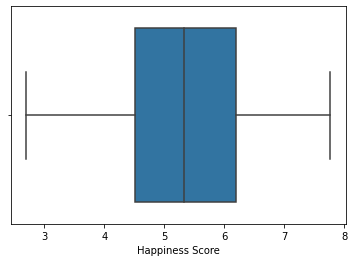

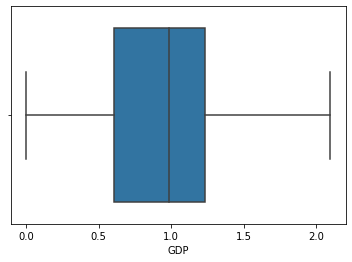

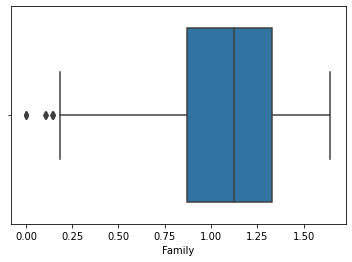

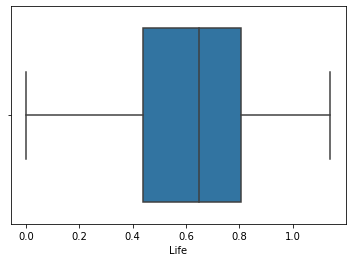

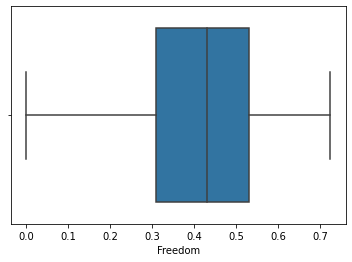

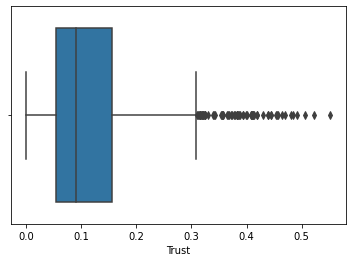

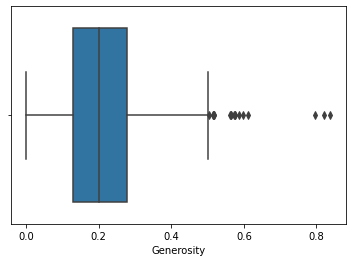

In [ ]:
column_list = ["Happiness Score","GDP","Family","Life","Freedom","Trust","Generosity"]
for col in column_list:
    sns.boxplot(x = df[col])
    plt.xlabel(col)
    plt.show()

In [ ]:
df_table = df["Trust"]
Q1 = df_table.quantile(0.25)
Q3 = df_table.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print("lower bound is " + str(lower_bound))
print("upper bound is " + str(upper_bound))
print("Q1: ", Q1)
print("Q3: ", Q3)

lower bound is -0.09904499999999998
upper bound is 0.309075
Q1:  0.054000000000000006
Q3:  0.15603


In [ ]:
outliers = (df_table < (lower_bound)) | (df_table > (upper_bound))

In [ ]:
outliers = df_table[outliers]
outliers.index.values

array([  0,   2,   3,   4,   5,   6,   7,   8,   9,  16,  19,  20,  21,
        23,  27,  34,  71,  90, 129, 153,   0,   1,   3,   4,   5,   7,
         8,   9,  19,  21,  27,  35,  74,  75,  96, 125, 151,   0,   1,
         3,   4,   7,   8,  17,  20,  25,  34, 150,   0,   1,   2,   4,
         7,   8,  16,  33, 150,   0,   1,   2,   5,   6,   7,  13,  15,
        33, 151])

In [ ]:
df_table = df["Generosity"]

Q1 = df_table.quantile(0.25)
Q3 = df_table.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print("lower bound is " + str(lower_bound))
print("upper bound is " + str(upper_bound))
print("Q1: ", Q1)
print("Q3: ", Q3)

lower bound is -0.09324874999999996
upper bound is 0.5020812499999999
Q1:  0.13
Q3:  0.2788325


In [ ]:
ge_outliers = (df_table < (lower_bound)) | (df_table > (upper_bound))

In [ ]:
ge_outliers = df_table[ge_outliers]
ge_outliers.index.values

array([ 20,  33,  36,  73,  90, 128,  29,  32,  78,  96, 118,  26,  31,
        80, 113, 129, 130])

In [ ]:
df_table = df.copy()
df_table["Trust"].iloc[outliers.index.values] = df_table["Trust"].mean()
df_table["Generosity"].iloc[ge_outliers.index.values] = df_table["Generosity"].mean()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_table.head()

Country  Happiness Rank  Year  ...  Freedom     Trust  Generosity
0  Switzerland               1  2015  ...  0.66557  0.125436     0.29678
1      Iceland               2  2015  ...  0.62877  0.125436     0.43630
2      Denmark               3  2015  ...  0.64938  0.125436     0.34139
3       Norway               4  2015  ...  0.66973  0.125436     0.34699
4       Canada               5  2015  ...  0.63297  0.125436     0.45811

[5 rows x 10 columns]

In [ ]:
df = df_table

In [ ]:
df.describe().T

count         mean  ...          75%          max
Happiness Rank   782.0    78.698210  ...   118.000000   158.000000
Year             782.0  2016.993606  ...  2018.000000  2019.000000
Happiness Score  782.0     5.379018  ...     6.189500     7.769000
GDP              782.0     0.916047  ...     1.236187     2.096000
Family           782.0     1.078392  ...     1.327250     1.644000
Life             782.0     0.612416  ...     0.808000     1.141000
Freedom          782.0     0.411091  ...     0.531000     0.724000
Trust            781.0     0.117784  ...     0.144000     0.505210
Generosity       782.0     0.215205  ...     0.271015     0.838075

[9 rows x 8 columns]

In [ ]:
df.shape

(782, 10)

In [ ]:
df.head()

Country  Happiness Rank  Year  ...  Freedom    Trust  Generosity
0  Switzerland               1  2015  ...  0.66557  0.41978     0.29678
1      Iceland               2  2015  ...  0.62877  0.14145     0.43630
2      Denmark               3  2015  ...  0.64938  0.48357     0.34139
3       Norway               4  2015  ...  0.66973  0.36503     0.34699
4       Canada               5  2015  ...  0.63297  0.32957     0.45811

[5 rows x 10 columns]

In [ ]:
df.tail()

Country  Happiness Rank  Year  ...  Freedom  Trust  Generosity
151                    Rwanda             152  2019  ...    0.555  0.411       0.217
152                  Tanzania             153  2019  ...    0.417  0.147       0.276
153               Afghanistan             154  2019  ...    0.000  0.025       0.158
154  Central African Republic             155  2019  ...    0.225  0.035       0.235
155               South Sudan             156  2019  ...    0.010  0.091       0.202

[5 rows x 10 columns]

In [ ]:
df.isnull().sum()

Country            0
Happiness Rank     0
Year               0
Happiness Score    0
GDP                0
Family             0
Life               0
Freedom            0
Trust              1
Generosity         0
dtype: int64

In [ ]:
df["Trust"].fillna(df["Trust"].median(),inplace=True)

In [ ]:
df.isnull().sum()

Country            0
Happiness Rank     0
Year               0
Happiness Score    0
GDP                0
Family             0
Life               0
Freedom            0
Trust              0
Generosity         0
dtype: int64

In [ ]:
df.describe().T

count         mean  ...          75%          max
Happiness Rank   782.0    78.698210  ...   118.000000   158.000000
Year             782.0  2016.993606  ...  2018.000000  2019.000000
Happiness Score  782.0     5.379018  ...     6.189500     7.769000
GDP              782.0     0.916047  ...     1.236187     2.096000
Family           782.0     1.078392  ...     1.327250     1.644000
Life             782.0     0.612416  ...     0.808000     1.141000
Freedom          782.0     0.411091  ...     0.531000     0.724000
Trust            782.0     0.117751  ...     0.144000     0.505210
Generosity       782.0     0.215205  ...     0.271015     0.838075

[9 rows x 8 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 782 entries, 0 to 155
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          782 non-null    object 
 1   Happiness Rank   782 non-null    int64  
 2   Year             782 non-null    int64  
 3   Happiness Score  782 non-null    float64
 4   GDP              782 non-null    float64
 5   Family           782 non-null    float64
 6   Life             782 non-null    float64
 7   Freedom          782 non-null    float64
 8   Trust            782 non-null    float64
 9   Generosity       782 non-null    float64
dtypes: float64(7), int64(2), object(1)
memory usage: 67.2+ KB


# **Data Visualization-REGİON**

In [ ]:
df15r=(pd.read_csv("2015.csv").drop(columns=["Standard Error","Dystopia Residual"])
.rename(columns={"Economy (GDP per Capita)": "GDP",
                     "Health (Life Expectancy)": "Life",
                     "Trust (Government Corruption)": "Trust"}))
df15r.insert(2,"Year",2015)

In [ ]:
df16r = (pd.read_csv("2016.csv").drop(columns=["Lower Confidence Interval","Upper Confidence Interval","Dystopia Residual"])
.rename(columns={"Economy (GDP per Capita)": "GDP",
                     "Health (Life Expectancy)": "Life",
                     "Trust (Government Corruption)": "Trust"}))
df16r.insert(2,"Year",2016)

In [ ]:
df17r = (pd.read_csv("2017.csv").drop(columns=["Whisker.high","Whisker.low","Dystopia.Residual"])
.rename(columns={"Happiness.Rank": "Happiness Rank",
                 "Happiness.Score": "Happiness Score",
                 "Economy..GDP.per.Capita.": "GDP",
                     "Health..Life.Expectancy.": "Life",
                     "Trust..Government.Corruption.": "Trust"}))
df17r.insert(2,"Year",2017)

In [ ]:
df17r["Region"] = None
df17re = df17r.set_index('Country').Region.fillna(df15r.set_index('Country').Region).reset_index()
df17r.Region.fillna(df17re["Region"], inplace = True)

In [ ]:
df18r = (pd.read_csv("2018.csv").rename(columns={"Overall rank": "Happiness Rank",
                                               "Country or region": "Country",
                                               "Score": "Happiness Score",
                                               "GDP per capita": "GDP",
                                               "Social support": "Family",
                                               "Healthy life expectancy": "Life",
                                               "Freedom to make life choices": "Freedom",
                                               "Perceptions of corruption": "Trust"}))
df18r.insert(2,"Year",2018)

In [ ]:
df18r["Region"] = None
df18re = df18r.set_index('Country').Region.fillna(df15r.set_index('Country').Region).reset_index()
df18r.Region.fillna(df18re["Region"], inplace = True)

In [ ]:
df19r = (pd.read_csv("2019.csv").rename(columns={"Overall rank": "Happiness Rank",
                                               "Country or region": "Country",
                                               "Score": "Happiness Score",
                                               "GDP per capita": "GDP",
                                               "Social support": "Family",
                                               "Healthy life expectancy": "Life",
                                               "Freedom to make life choices": "Freedom",
                                               "Perceptions of corruption": "Trust"}))
df19r.insert(2,"Year",2019)

In [ ]:
df19r["Region"] = None
df19re = df19r.set_index('Country').Region.fillna(df15r.set_index('Country').Region).reset_index()
df19r.Region.fillna(df19re["Region"], inplace = True)

In [ ]:
df17r[df17r.isnull().any(axis=1)]

In [ ]:
df17r.loc[32, ["Region"]] = "Eastern Asia"
df17r.loc[49, ["Region"]] = "Latin America and Caribbean"
df17r.loc[70, ["Region"]] = "Eastern Asia"
df17r.loc[92, ["Region"]] = "Sub-Saharan Africa"
df17r.loc[110, ["Region"]] = "Sub-Saharan Africa"
df17r.loc[146, ["Region"]] = "Sub-Saharan Africa"

In [ ]:
df18r[df18r.isnull().any(axis=1)]

In [ ]:
df18r.loc[37, ["Region"]] = "Latin America and Caribbean"
df18r.loc[48, ["Region"]] = "Latin America and Caribbean"
df18r.loc[57, ["Region"]] = "Middle East and Northern Africa"
df18r.loc[97, ["Region"]] = "Sub-Saharan Africa"
df18r.loc[118, ["Region"]] = "Sub-Saharan Africa"
df18r.loc[153, ["Region"]] = "Sub-Saharan Africa"

In [ ]:
df19r[df19r.isnull().any(axis=1)]

In [ ]:
df19r.loc[38, ["Region"]] = "Latin America and Caribbean"
df19r.loc[63, ["Region"]] = "Middle East and Northern Africa"
df19r.loc[83, ["Region"]] = "Central and Eastern Europe"
df19r.loc[111, ["Region"]] = "Sub-Saharan Africa"
df19r.loc[112, ["Region"]] = "Sub-Saharan Africa"
df19r.loc[119, ["Region"]] = "Sub-Saharan Africa"
df19r.loc[155, ["Region"]] = "Sub-Saharan Africa"

In [ ]:
dfr = pd.concat([df15r,df16r,df17r,df18r,df19r])

In [ ]:
dfr["Trust"].fillna(dfr["Trust"].median(),inplace=True)

In [ ]:
fig = px.histogram(dfr, x="Region",
                   width=600, 
                   height=500,
                   histnorm='density',
                   template="simple_white",
                  facet_col="Year",
                   )
fig.update_layout(title="Numbers Of Countries In The Region", 
                  font_family="San Serif",
                  titlefont={'size': 30},
                  showlegend=True,
                  legend=dict(
                      orientation="v",
                      y=1.0, 
                      yanchor="top", 
                      x=1.0, 
                      xanchor="right"
                  )                 
                 )
fig.update_traces(marker_color=None, marker_line_color='white',
                  marker_line_width=1.5, opacity=0.99)
fig.show()


In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
labels = ["Australia and New Zealand", "Eastern Asia", "Latin America and Caribbean", "Middle East and Northern Africa", 
          "North America","Southeastern Asia","Southern Asia","Sub-Saharan Africa","Western Europe"]

fig = make_subplots(2, 3, specs=[[{'type': 'domain'},    {'type': 'domain'},{'type': 'domain'}],
                           [{'type': 'domain'}, {'type': 'domain'},{'type': 'domain'}]],
                    subplot_titles=['2015','2016','2017','2018','2019'])
fig.add_trace(go.Pie(labels=labels, values=[2, 29, 6, 22, 20,2,9,7,40,21], scalegroup='one',
                     name="2015"), 1, 1)
fig.add_trace(go.Pie(labels=labels, values=[2, 29, 6, 24, 19,2,9,7,38,21], scalegroup='one',
                     name="2016"), 1, 2)
fig.add_trace(go.Pie(labels=labels, values=[2, 29, 6, 22, 19,2,8,7,39,21], scalegroup='one',
                     name="2017"), 2, 1)
fig.add_trace(go.Pie(labels=labels, values=[2, 29, 6, 22, 20,2,9,7,39,20], scalegroup='one',
                     name="2018"), 2, 2)
fig.add_trace(go.Pie(labels=labels, values=[2, 29, 6, 21, 20,2,9,7,40,20], scalegroup='one',
                     name="2019"), 1, 3)

fig.update_layout(title_text='Number of Countries in Regions by Year')
fig.show()

In [ ]:
from wordcloud import WordCloud,STOPWORDS

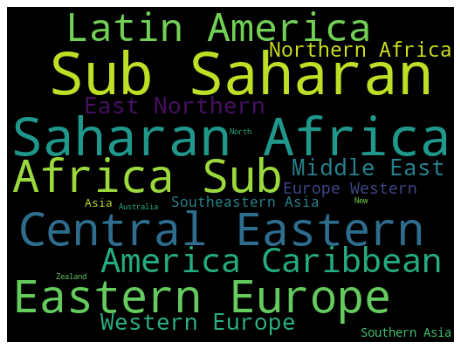

In [ ]:
mp19 = dfr.Region[dfr.Year == 2019]
plt.subplots(figsize=(8,8))
wordcloud = WordCloud(background_color='black', width=512, height=384).generate(" ".join(mp19))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
rd = dfr.Region[dfr.Year == 2019]
cd = dfr.Country[dfr.Year == 2019]
ndf=pd.concat([rd,cd],axis=1)

In [ ]:
fig = go.Figure()
fig.add_trace(
    go.Pie(
        labels=ndf['Region'],
        values=None,
        pull=[0.5, 0, 0, 0, 0, 0],
        ),   
    )
fig.update_traces(
    hoverinfo='label+value',
    textinfo='label+percent',
    textfont_size=12,
    marker=dict(
        colors=['lightseagreen', 'lightsalmon'],
        line=dict(color='#000000',
                  width=2)
        )
    )
fig.layout.update(title="Number of Countries in Regions",
                  titlefont={'size':28, 'family': 'Serif',},
                  showlegend=False, 
                  height=600, 
                  width=600, 
                  template=None, 
                 )
fig.show()

In [ ]:
DF= pd.DataFrame(ndf.groupby("Region")["Country"].count().sort_values(ascending = False))
DF.reset_index(level=0,inplace=True)

fig = px.pie(DF,
             values='Country',
             names='Region',
             hover_data=['Country'],
             labels={'Country':'Country'}
            )
fig.update_traces(textposition='inside',
                  textinfo='percent+label'
                 )
fig.update_layout(title='Number of Countries in Regions',
                  titlefont={'size': 24,
                             'family': 'Serif',
                            },
                  showlegend=False, 
                  width=600, 
                  height=600)
fig.show()

In [ ]:
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot, plot

In [ ]:

fig = px.bar(ndf ,x="Region",y=ndf['Country'].value_counts(), barmode="relative", text = ndf.Country,color="Region",orientation="v",
             color_discrete_map={"Australia and New Zealand": "red",
                                      "Eastern Asia": "green", 
                                      "Latin America and Caribbean": "blue",
                                      "Middle East and Northern Africa": "goldenrod",
                                       "North America": "magenta",
                                      "Southeastern Asia": "darkgray",
                                      "Sub-Saharan Africa": "olive",
                                      "Western Europe": "saddlebrown"},
             category_orders={"Region": ["Australia and New Zealand", "Eastern Asia", "Latin America and Caribbean", "Middle East and Northern Africa", 
          "North America","Southeastern Asia","Southern Asia","Sub-Saharan Africa","Western Europe"]})
fig.show()

In [ ]:
import plotly.express as px

In [ ]:
pip install squarify

In [ ]:
import squarify

In [ ]:
ed19=ndf['Region'].value_counts()
ed19.sort_values(ascending=False)

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        21
Western Europe                     20
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64

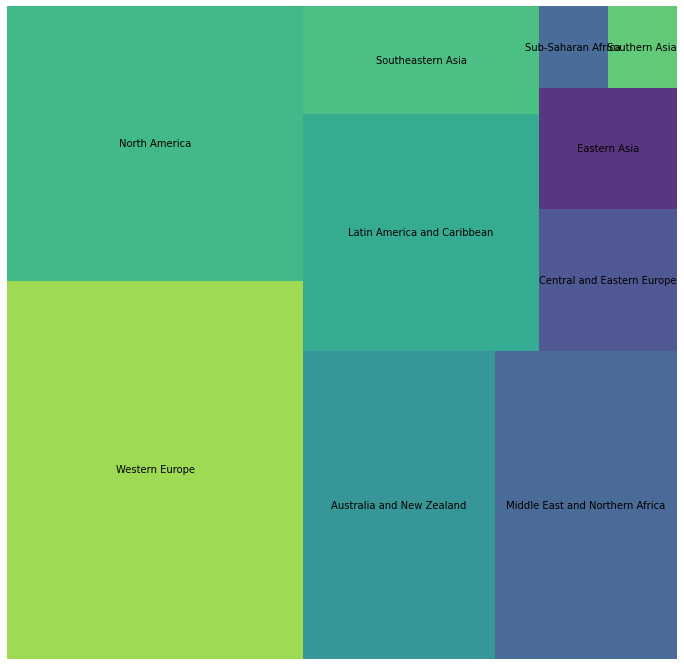

In [ ]:
fig, ax = plt.subplots(1, figsize = (12,12))
squarify.plot(sizes=ed19,
              label=pd.unique(dfr['Region']), 
              alpha=.9,) 

plt.axis('off')
plt.show()

In [ ]:
grouped = dfr.groupby(by = 'Year')[['Happiness Score', 'GDP',
       'Family', 'Life',
       'Freedom', 'Generosity',
       'Trust']].mean().reset_index()

# Now we reconstruct the df by using melt() function
grouped = pd.melt(frame = grouped, id_vars='Year', value_vars=['Happiness Score', 'GDP',
       'Family', 'Life',
       'Freedom', 'Generosity',
       'Trust'], var_name='Factor', value_name='Avg_value')

grouped.head()

Year           Factor  Avg_value
0  2015  Happiness Score   5.375734
1  2016  Happiness Score   5.382185
2  2017  Happiness Score   5.354019
3  2018  Happiness Score   5.375917
4  2019  Happiness Score   5.407096

In [ ]:
my_palette = sns.color_palette()

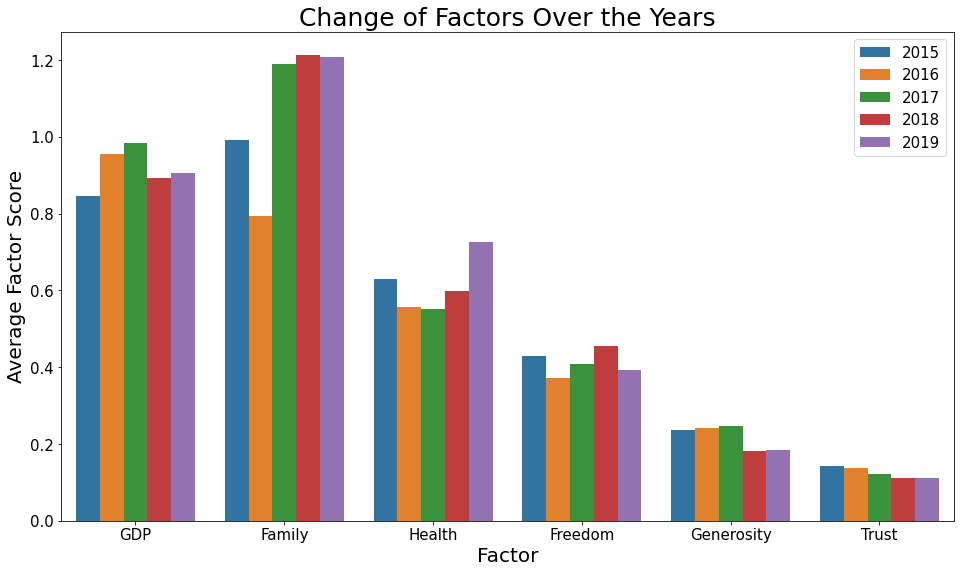

In [ ]:
plt.figure(figsize = (16, 9))

ax = sns.barplot(x = grouped[grouped['Factor'] != 'Happiness Score']['Factor'], y = grouped['Avg_value'], 
            palette = my_palette, hue = grouped['Year'])

plt.title("Change of Factors Over the Years", fontsize = 25)
plt.xlabel("Factor", fontsize = 20)
plt.ylabel("Average Factor Score", fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(fontsize = 15)

ax.set_xticklabels(['GDP','Family', 'Health', 'Freedom', 'Generosity', 'Trust']);

# **Data visualization** 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 782 entries, 0 to 155
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          782 non-null    object 
 1   Happiness Rank   782 non-null    int64  
 2   Year             782 non-null    int64  
 3   Happiness Score  782 non-null    float64
 4   GDP              782 non-null    float64
 5   Family           782 non-null    float64
 6   Life             782 non-null    float64
 7   Freedom          782 non-null    float64
 8   Trust            782 non-null    float64
 9   Generosity       782 non-null    float64
dtypes: float64(7), int64(2), object(1)
memory usage: 67.2+ KB


In [ ]:
newdata =df.drop(columns=["Country","Happiness Rank"],axis=1)

In [ ]:
newdata.head()

Year  Happiness Score      GDP  ...  Freedom    Trust  Generosity
0  2015            7.587  1.39651  ...  0.66557  0.41978     0.29678
1  2015            7.561  1.30232  ...  0.62877  0.14145     0.43630
2  2015            7.527  1.32548  ...  0.64938  0.48357     0.34139
3  2015            7.522  1.45900  ...  0.66973  0.36503     0.34699
4  2015            7.427  1.32629  ...  0.63297  0.32957     0.45811

[5 rows x 8 columns]

In [ ]:
newdata.shape

(782, 8)

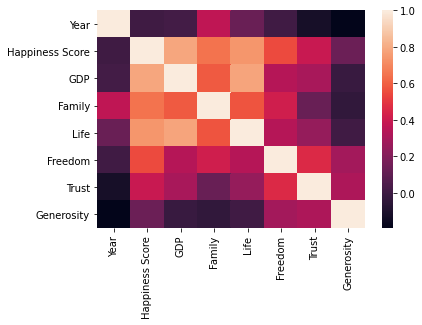

In [ ]:
sns.heatmap(newdata.corr());

In [ ]:
from statsmodels.api import OLS

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:
print(OLS(endog=newdata["Happiness Score"],exog=newdata.drop(columns="Happiness Score")).fit().summary())

                                 OLS Regression Results                                
Dep. Variable:        Happiness Score   R-squared (uncentered):                   0.990
Model:                            OLS   Adj. R-squared (uncentered):              0.990
Method:                 Least Squares   F-statistic:                          1.104e+04
Date:                Fri, 03 Sep 2021   Prob (F-statistic):                        0.00
Time:                        14:45:58   Log-Likelihood:                         -638.68
No. Observations:                 782   AIC:                                      1291.
Df Residuals:                     775   BIC:                                      1324.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
for i in newdata.drop(columns=["Happiness Score"]).columns:
  print(i)

Year
GDP
Family
Life
Freedom
Trust
Generosity


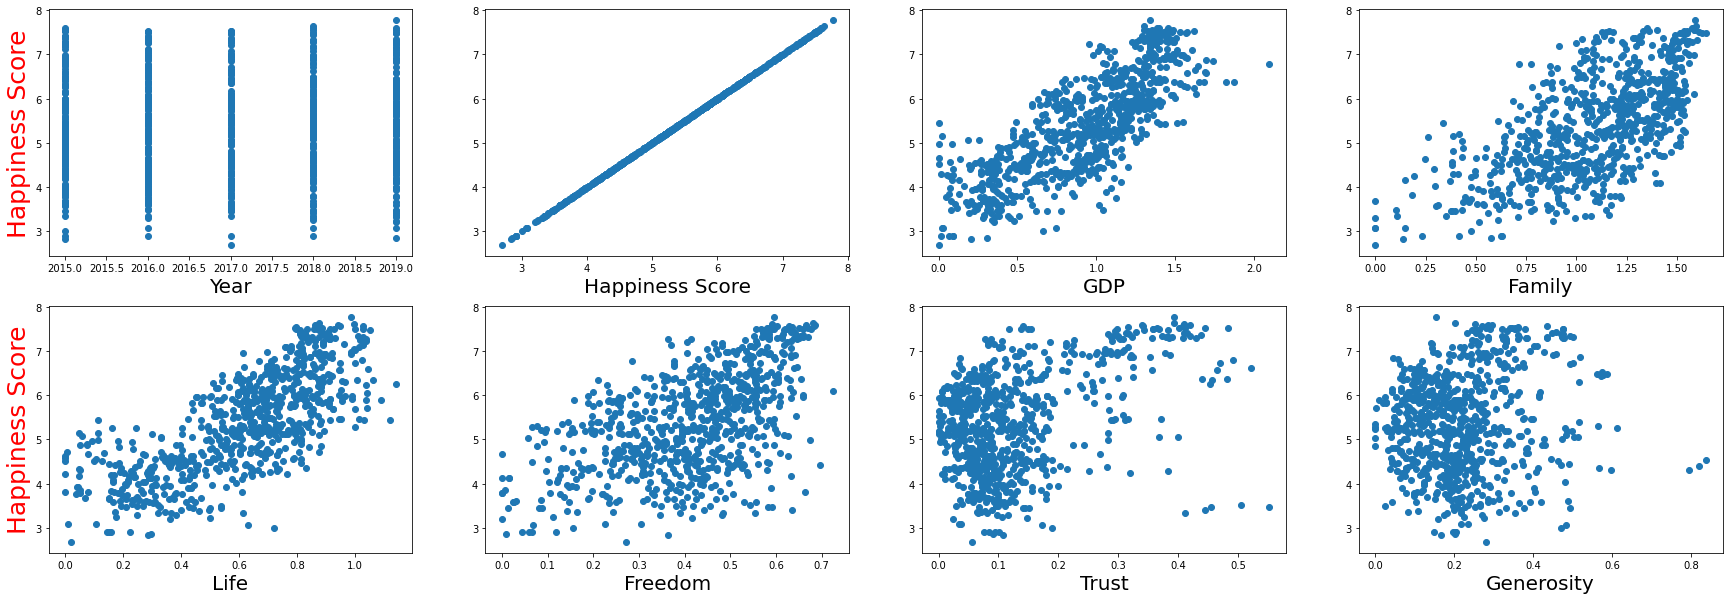

In [ ]:
fig,ax=plt.subplots(nrows=2,ncols=4,figsize=(30,10))
a=0
b=0
for i in newdata.columns:
  ax[a,b].scatter(y=newdata["Happiness Score"],x=newdata[i])
  ax[a,b].set_xlabel(i,fontsize=20)
  b+=1
  if b==4:
    a+=1
    b=0
  if a==2:
    break
ax[0,0].set_ylabel("Happiness Score",color="red",fontsize=25)    
ax[1,0].set_ylabel("Happiness Score",color="red",fontsize=25);

In [ ]:
targets = ['Low', 'Low-Mid', 'Top-Mid', 'Top']

In [ ]:
newdata.head()

Year  Happiness Score      GDP  ...  Freedom    Trust  Generosity
0  2015            7.587  1.39651  ...  0.66557  0.41978     0.29678
1  2015            7.561  1.30232  ...  0.62877  0.14145     0.43630
2  2015            7.527  1.32548  ...  0.64938  0.48357     0.34139
3  2015            7.522  1.45900  ...  0.66973  0.36503     0.34699
4  2015            7.427  1.32629  ...  0.63297  0.32957     0.45811

[5 rows x 8 columns]

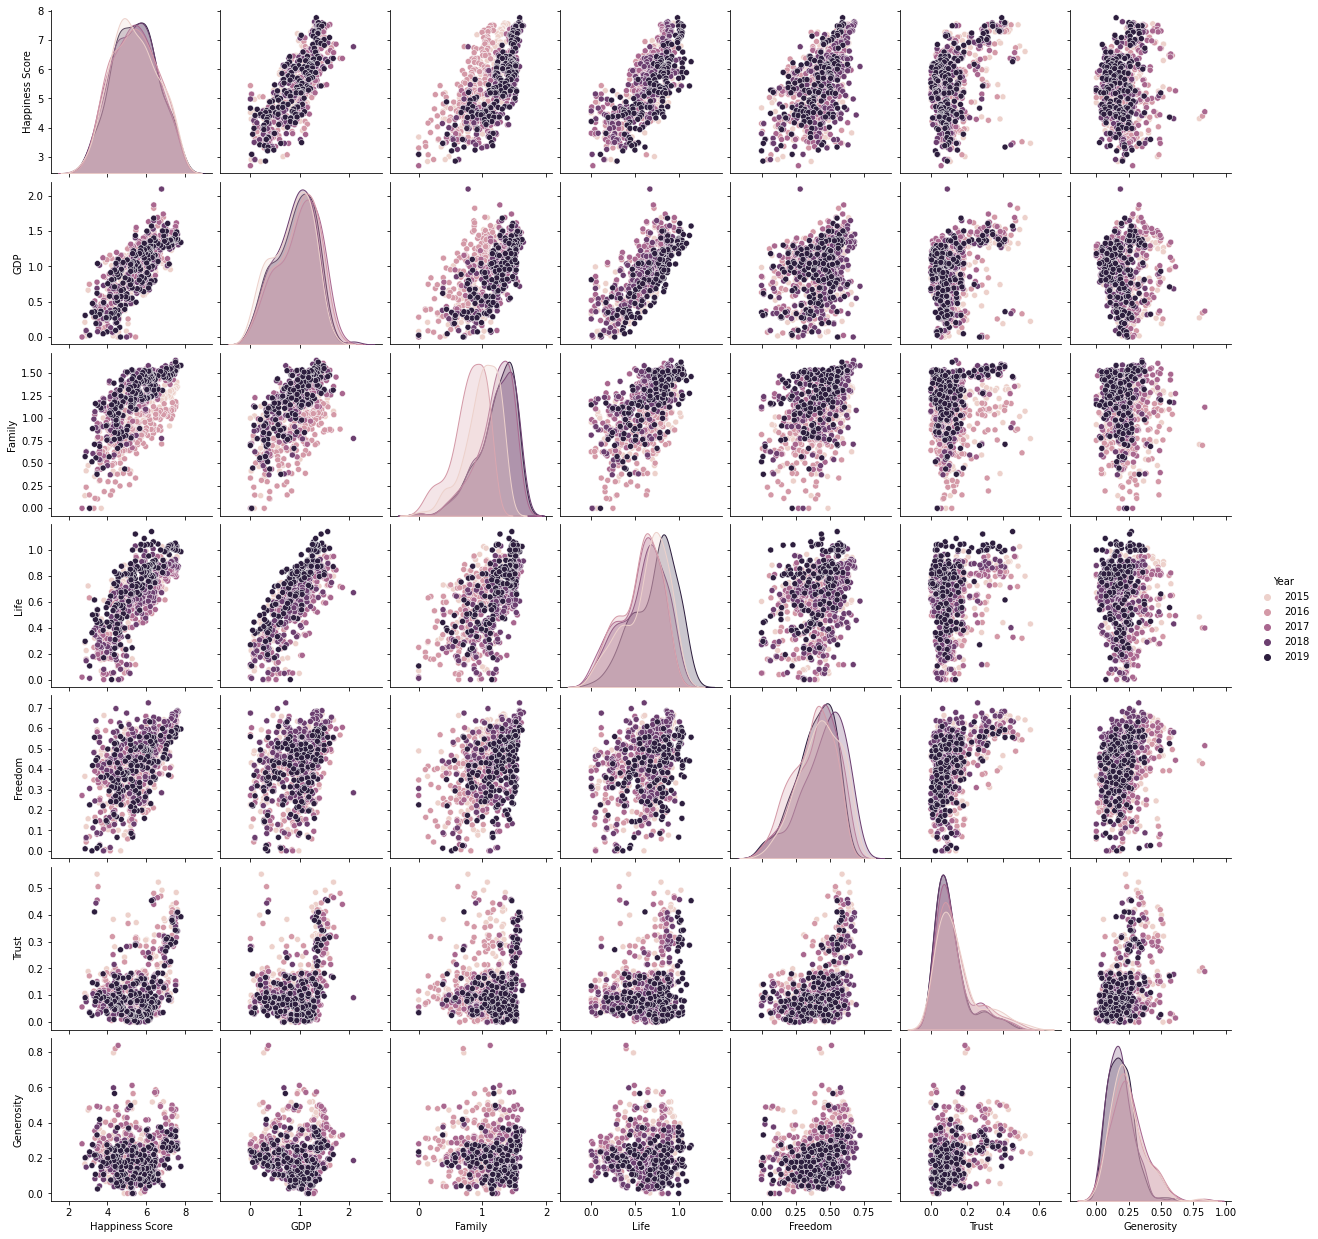

In [ ]:
sns.pairplot(newdata, hue="Year");

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning

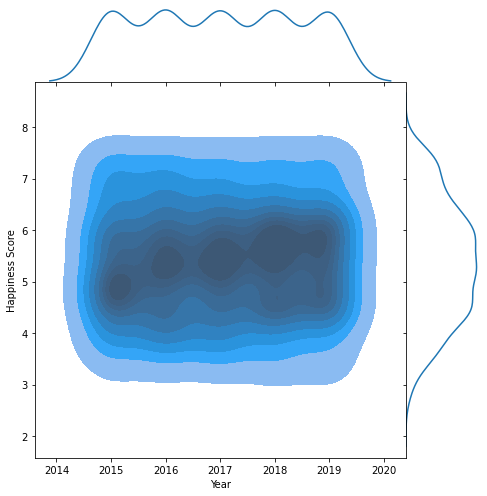

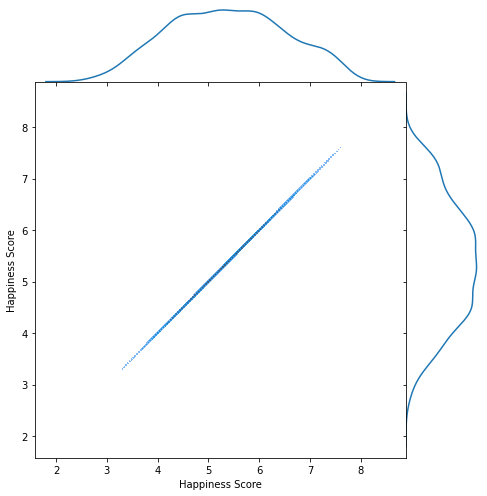

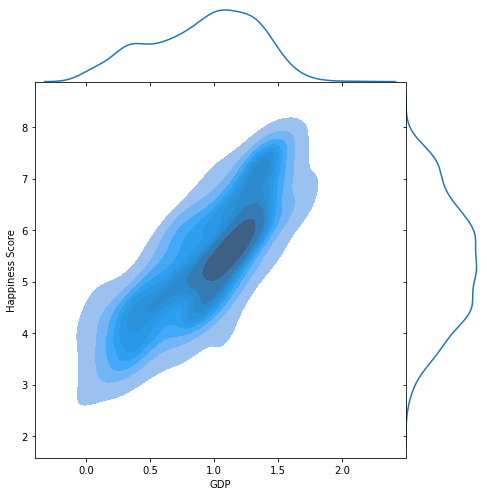

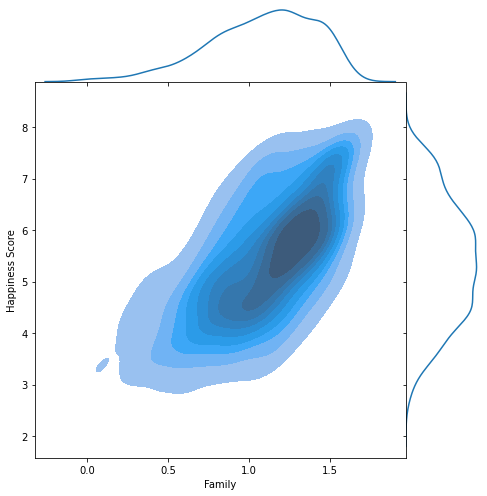

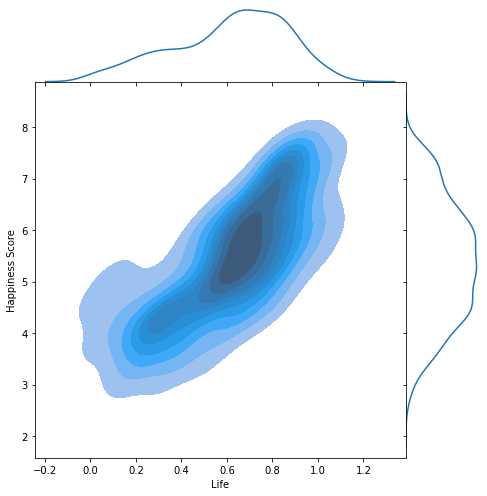

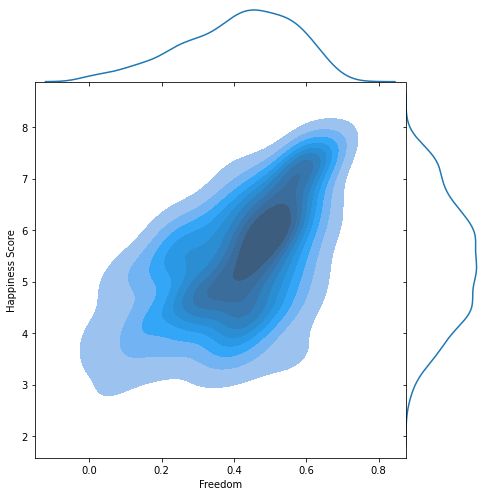

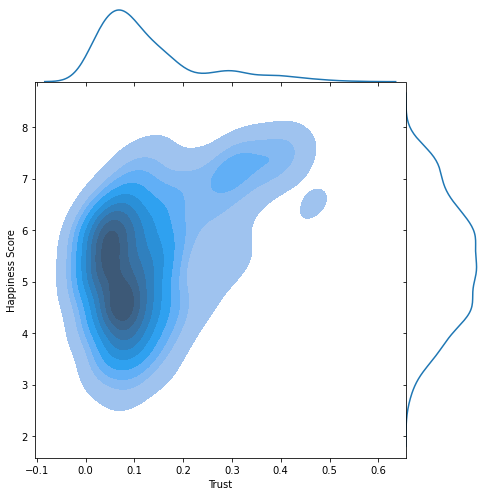

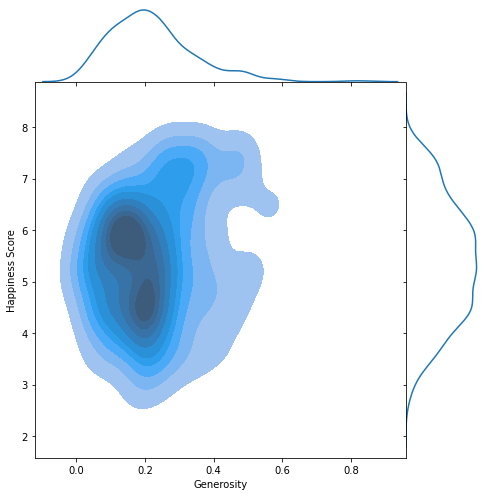

In [ ]:
for cols in newdata.columns:
  sns.jointplot(newdata[cols],newdata["Happiness Score"],kind="kde",height=7,space=0,shade=True);
  

In [ ]:
df15_gdp = pd.concat([df15["Country"],df15["Year"],df15["GDP"]],axis=1)
df16_gdp = pd.concat([df16["Country"],df16["Year"],df16["GDP"]],axis=1)
df17_gdp = pd.concat([df17["Country"],df17["Year"],df17["GDP"]],axis=1)
df18_gdp = pd.concat([df18["Country"],df18["Year"],df18["GDP"]],axis=1)
df19_gdp = pd.concat([df19["Country"],df19["Year"],df19["GDP"]],axis=1)

In [ ]:
df_gdp=pd.concat([df15_gdp,df16_gdp,df17_gdp,df18_gdp,df19_gdp])

In [ ]:
df_gdp

Country  Year      GDP
0                 Switzerland  2015  1.39651
1                     Iceland  2015  1.30232
2                     Denmark  2015  1.32548
3                      Norway  2015  1.45900
4                      Canada  2015  1.32629
..                        ...   ...      ...
151                    Rwanda  2019  0.35900
152                  Tanzania  2019  0.47600
153               Afghanistan  2019  0.35000
154  Central African Republic  2019  0.02600
155               South Sudan  2019  0.30600

[782 rows x 3 columns]

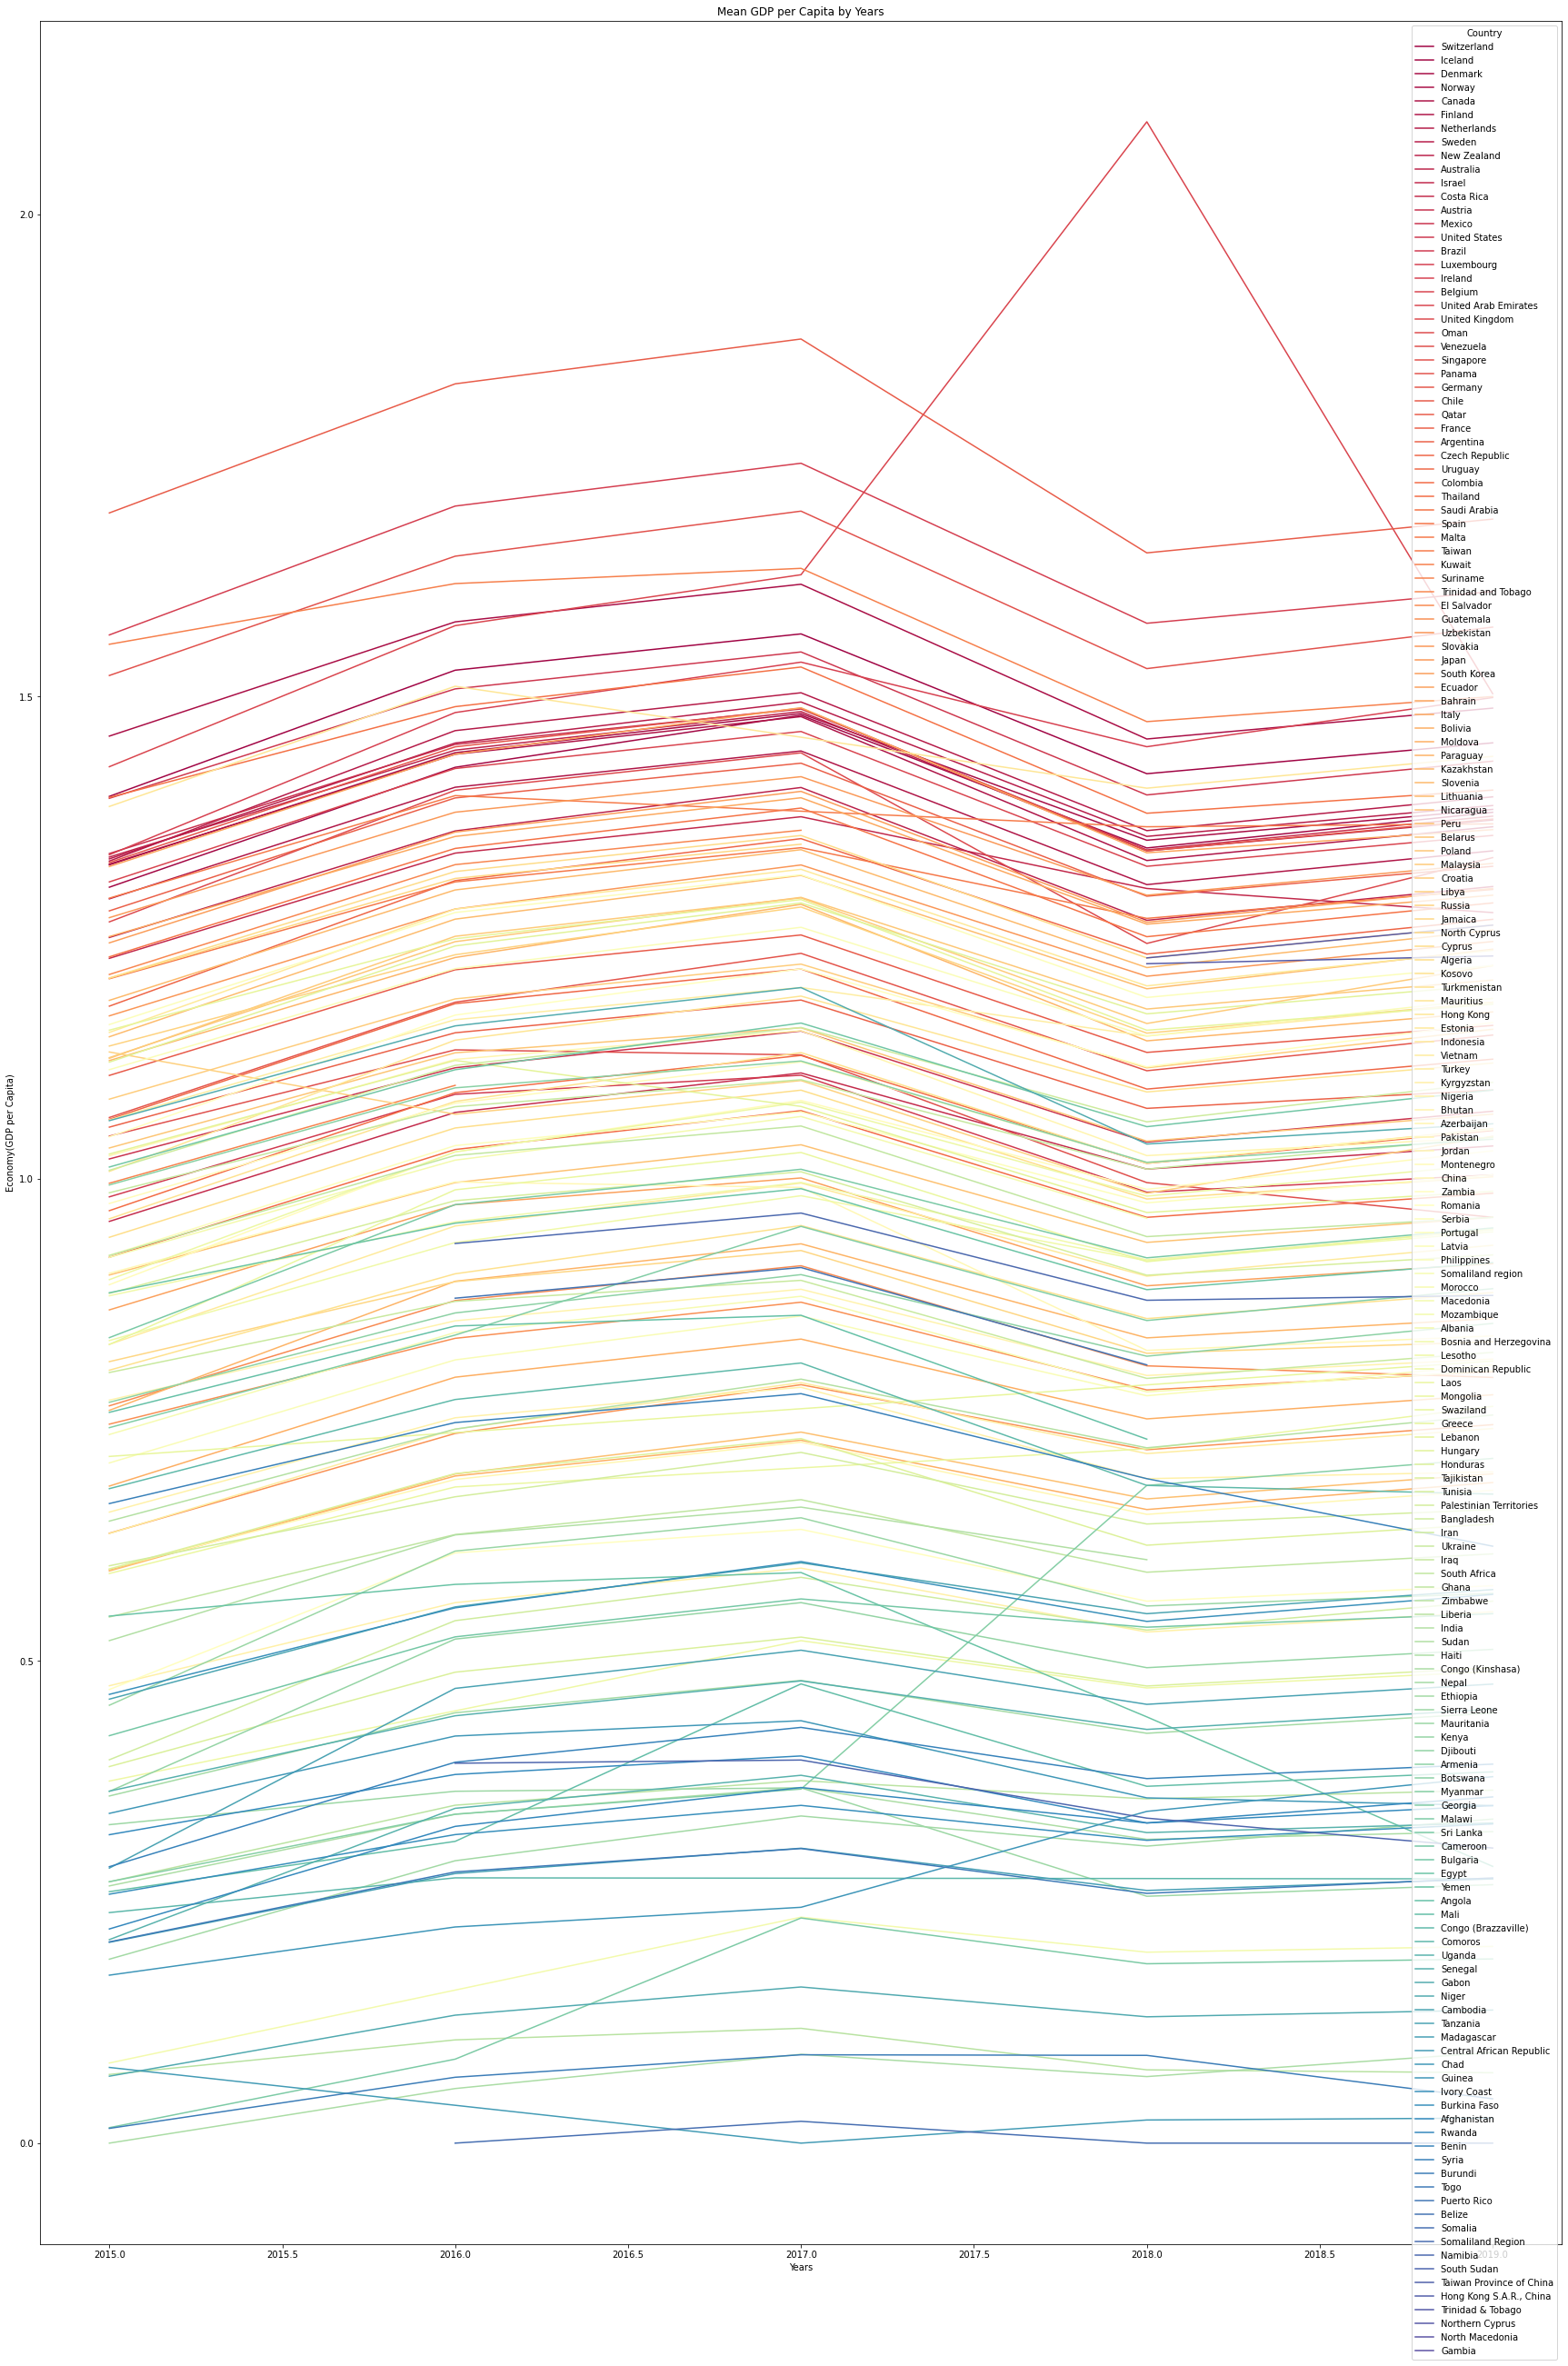

In [ ]:
plt.figure(figsize = (30,45))
sns.lineplot(x="Year", y="GDP",
             data= df_gdp,hue="Country", palette = "Spectral")
plt.xlabel("Years")
plt.ylabel("Economy(GDP per Capita)")
plt.title("Mean GDP per Capita by Years")
plt.show()

# **Scale and Split**

In [ ]:
from sklearn import preprocessing

In [ ]:
se =preprocessing.StandardScaler()

In [ ]:
type(newdata)

pandas.core.frame.DataFrame

In [ ]:
newdata.values.shape

(782, 8)

In [ ]:
newdataarray=newdata.values

In [ ]:
newdataarray_as=se.fit_transform(newdataarray)

In [ ]:
newdataarray

array([[2.01500000e+03, 7.58700000e+00, 1.39651000e+00, ...,
        6.65570000e-01, 1.25435614e-01, 2.96780000e-01],
       [2.01500000e+03, 7.56100000e+00, 1.30232000e+00, ...,
        6.28770000e-01, 1.25435614e-01, 4.36300000e-01],
       [2.01500000e+03, 7.52700000e+00, 1.32548000e+00, ...,
        6.49380000e-01, 1.25435614e-01, 3.41390000e-01],
       ...,
       [2.01900000e+03, 3.20300000e+00, 3.50000000e-01, ...,
        0.00000000e+00, 2.50000000e-02, 1.58000000e-01],
       [2.01900000e+03, 3.08300000e+00, 2.60000000e-02, ...,
        2.25000000e-01, 3.50000000e-02, 2.35000000e-01],
       [2.01900000e+03, 2.85300000e+00, 3.06000000e-01, ...,
        1.00000000e-02, 9.10000000e-02, 2.02000000e-01]])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(newdata.drop(columns=["Happiness Score"]).values,newdata["Happiness Score"].values,test_size=0.12,random_state=0)

In [ ]:
X_train.shape

(688, 7)

In [ ]:
X_test.shape

(94, 7)

In [ ]:
y_train.shape

(688,)

In [ ]:
x_train_as=se.fit_transform(X_train)
x_test_as=se.fit_transform(X_test)

# **Linear Regression** 

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model_le=LinearRegression()

In [ ]:
model_le.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
model_le.coef_

array([-0.09102973,  0.98588394,  0.77034806,  1.21652506,  1.38859644,
        1.12379008,  0.39845122])

In [ ]:
model_le.intercept_

185.72257841040616

In [ ]:
l_y_pred =model_le.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error

In [ ]:
print("Model Score:",model_le.score(X_train,y_train)*100)

Model Score: 76.5204581191486


In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cross_val_score(model_le,X_train,y_train,cv=10,scoring="r2").mean()*100

75.24761143431672

*Model Tuning*

In [ ]:
l_score=model_le.score(X_train,y_train)*100
l_cv_score=cross_val_score(model_le,X_train,y_train,cv=10,scoring="r2").mean()*100
l_test_score =r2_score(y_test,l_y_pred)*100

In [ ]:
print("Model Score:",model_le.score(X_train,y_train)*100)
print("test-R2 cv score:",cross_val_score(model_le,X_train,y_train,cv=10,scoring="r2").mean()*100)

Model Score: 76.5204581191486
test-R2 cv score: 75.24761143431672


# **L1 Lasso Regresyon** 

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
lasso_model = Lasso(alpha=0.1)

In [ ]:
lasso_model.fit(X_train,y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
print("Model Score:",lasso_model.score(X_train,y_train)*100)

Model Score: 58.010873823489405


*Lasso-Model Tuning*

In [ ]:
from sklearn.linear_model import LassoCV

In [ ]:
lasso_cv_model = LassoCV(alphas=None,max_iter=10000,cv=10).fit(X_train,y_train)

In [ ]:
lasso_cv_model.alpha_

0.0003526934189511618

*Final Model*

In [ ]:
lasso_tuned = Lasso(alpha=lasso_cv_model.alpha_)

In [ ]:
lasso_tuned.fit(X_train,y_train)

Lasso(alpha=0.0003526934189511618, copy_X=True, fit_intercept=True,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
lt_y_pred=lasso_tuned.predict(X_test)

In [ ]:
lasso_score= lasso_tuned.score(X_train,y_train)*100
lasso_cv_score =cross_val_score(lasso_tuned,X_train,y_train,cv=10,scoring="r2").mean()*100
lasso_test_score=r2_score(y_test,lt_y_pred)*100


In [ ]:
print("Model Score:",lasso_tuned.score(X_train,y_train)*100)
print("R2 cv score:",cross_val_score(lasso_tuned,X_train,y_train,cv=10,scoring="r2").mean()*100)

Model Score: 76.51885372617278
R2 cv score: 75.25029924363385


# **L2 Ridge Regresyon** 

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
ridge_model=Ridge(alpha=0.1).fit(X_train,y_train)

In [ ]:
print("Model Score:",ridge_model.score(X_train,y_train)*100)
print("test-R2 cv score:",cross_val_score(ridge_model,X_train,y_train,cv=10,scoring="r2").mean()*100)

Model Score: 76.52013475691314
test-R2 cv score: 75.253129387905


*Ridge_Model Tuning*

In [ ]:
from sklearn.linear_model import RidgeCV

In [ ]:
alphalar= 10**np.linspace(10,-2,100)

In [ ]:
ridge_cv = RidgeCV(alphas=alphalar,scoring="neg_mean_squared_error",cv=10)

In [ ]:
ridge_cv.fit(X_train,y_train)

RidgeCV(alphas=array([1.00000000e+10, 7.56463328e+09, 5.72236766e+09, 4.32876128e+09,
       3.27454916e+09, 2.47707636e+09, 1.87381742e+09, 1.41747416e+09,
       1.07226722e+09, 8.11130831e+08, 6.13590727e+08, 4.64158883e+08,
       3.51119173e+08, 2.65608778e+08, 2.00923300e+08, 1.51991108e+08,
       1.14975700e+08, 8.69749003e+07, 6.57933225e+07, 4.97702356e+07,
       3.76493581e+07, 2.84803587e+0...
       6.57933225e-01, 4.97702356e-01, 3.76493581e-01, 2.84803587e-01,
       2.15443469e-01, 1.62975083e-01, 1.23284674e-01, 9.32603347e-02,
       7.05480231e-02, 5.33669923e-02, 4.03701726e-02, 3.05385551e-02,
       2.31012970e-02, 1.74752840e-02, 1.32194115e-02, 1.00000000e-02]),
        cv=10, fit_intercept=True, gcv_mode=None, normalize=False,
        scoring='neg_mean_squared_error', store_cv_values=False)

*En iyi alpha değeri*

In [ ]:
ridge_cv.alpha_

0.6579332246575682

*Final Model*

In [ ]:
ridge_tuned = Ridge(alpha=ridge_cv.alpha_)

In [ ]:
ridge_tuned.fit(X_train,y_train)

Ridge(alpha=0.6579332246575682, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
rd_pred =ridge_tuned.predict(X_test)

In [ ]:
rd_score=ridge_tuned.score(X_train,y_train)*100
rd_cv_score =cross_val_score(ridge_tuned,X_train,y_train,cv=10,scoring="r2").mean()*100
rd_test_score = r2_score(y_test,rd_pred)*100

In [ ]:

print("Model Score:",ridge_tuned.score(X_train,y_train)*100)
print("R2 cv score:",cross_val_score(ridge_tuned,X_train,y_train,cv=10,scoring="r2").mean()*100)

Model Score: 76.50818528750045
R2 cv score: 75.2681086904338


# **SVR** 

In [ ]:
from sklearn.svm import SVR

In [ ]:
svr_model1=[["SVR_linear",SVR("linear")],["SVR_rbf",SVR("rbf")],["SVR_poly",SVR("poly")],["SVR_sigmoid",SVR("sigmoid")]]

In [ ]:
for name,model in svr_model1:
    model = model.fit(x_train_as, y_train)
    
    print("%s -> r2: %%%.2f" % (name,model.score(x_train_as,y_train)*100))

SVR_linear -> r2: %76.13
SVR_rbf -> r2: %85.59
SVR_poly -> r2: %72.02
SVR_sigmoid -> r2: %-7289.83


*SVR-Model Tuning*

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
svr_model = SVR().fit(x_train_as, y_train)

In [ ]:
svr_model.score(X_train,y_train)

-0.17410852930491538

In [ ]:
svr_params_rbf={"C":np.arange(0.1,2,0.1)}

In [ ]:
svr_rbf= SVR("rbf").fit(x_train_as, y_train)
svr_cv_model = GridSearchCV(svr_rbf,svr_params_rbf,cv=10)
svr_cv_model.fit(x_train_as,y_train) 
print("Rbf_best parameter:"+ str("%.2f"%pd.Series(svr_cv_model.best_params_)))


Rbf_best parameter:1.90


*Rbf-Model Tuning*

In [ ]:
svr_rbf_tuned = SVR("rbf",C=1.90).fit(x_train_as,y_train) 

In [ ]:
rbf_y_pred=svr_rbf_tuned.predict(x_test_as)

In [ ]:
svr_score=svr_rbf_tuned.score(x_train_as,y_train)*100
svr_cv_score= cross_val_score(svr_rbf_tuned,x_train_as,y_train,cv=10,scoring="r2").mean()*100
svr_test_score = r2_score(y_test,rbf_y_pred)*100

In [ ]:
print("Model Score:",svr_rbf_tuned.score(x_train_as,y_train)*100)
print("R2 cv Score:",cross_val_score(svr_rbf_tuned,x_train_as,y_train,cv=10,scoring="r2").mean()*100)

Model Score: 87.24004262335002
R2 cv Score: 80.92566357981654


# **Polynomial Regression** 

In [ ]:
from sklearn.preprocessing import PolynomialFeatures


In [ ]:
poly_reg = PolynomialFeatures(degree=3)

In [ ]:
x_train_poly=poly_reg.fit_transform(X_train)
x_test_poly=poly_reg.fit_transform(X_test)

In [ ]:
poly_reg =LinearRegression()

In [ ]:
poly_reg.fit(x_train_poly,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
poly_reg.intercept_

-727109397.8377031

In [ ]:
poly_reg.coef_

array([ 3.55695460e-03,  1.08170532e+06,  8.30756568e+05, -2.65715710e+05,
       -1.83479890e+06, -2.33011244e+05,  8.38996187e+05,  8.70779281e+05,
       -5.36410034e+02, -8.23644496e+02,  2.64230380e+02,  1.81993671e+03,
        2.29793193e+02, -8.30347940e+02, -8.64358526e+02, -3.96884676e+02,
       -1.47740542e+03,  1.91315691e+03,  1.82776271e+03,  2.61241179e+03,
       -1.31992355e+03,  8.52040067e+02, -1.80967639e+03, -2.71027194e+02,
       -3.18547102e+03, -4.14382043e+03, -1.63179239e+03,  1.07252910e+03,
       -2.10520182e+03,  7.83554274e+03,  3.03734493e+02,  3.29118284e+03,
        3.29585660e+03, -5.83887874e+03,  1.37540041e+03,  1.91968433e+03,
        8.86673110e-02,  2.04147705e-01, -6.56866892e-02, -4.51296679e-01,
       -5.66519819e-02,  2.05448267e-01,  2.14499680e-01,  1.98089705e-01,
        7.33272190e-01, -9.49327488e-01, -9.06488172e-01, -1.29226914e+00,
        6.56818431e-01, -4.22183317e-01,  8.92642066e-01,  1.30766785e-01,
        1.57366096e+00,  

In [ ]:
poly_y_pred=poly_reg.predict(x_test_poly)

In [ ]:
poly_score=poly_reg.score(x_train_poly,y_train)*100
poly_cv_score=cross_val_score(poly_reg,x_train_poly,y_train,cv=10,scoring="r2").mean()*100
poly_test_score = r2_score(y_test,poly_y_pred)*100

In [ ]:
print("Model Score:",poly_reg.score(x_train_poly,y_train)*100)
print("R2 cv Score:",cross_val_score(poly_reg,x_train_poly,y_train,cv=10,scoring="r2").mean()*100)

Model Score: 85.68336162005443
R2 cv Score: 75.34715991860774


# **Random Forest** 

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf_model = RandomForestRegressor(random_state=42).fit(X_train,y_train)

In [ ]:
print("Model Score:",rf_model.score(X_train,y_train)*100)
print("R2 cv score:",cross_val_score(rf_model,X_train,y_train,cv=10,scoring="r2").mean()*100)

Model Score: 97.18853844386928
R2 cv score: 79.09653060499265


*RF-Model Tuning*

In [ ]:
rf_params= {"max_depth": list(range(1,10)),
             "max_features": [2,3,4,5,6],
            "n_estimators": [100,200,300,400,500,800] }

In [ ]:
rf_model=RandomForestRegressor(random_state=42)

In [ ]:
rf_cv_model=GridSearchCV(rf_model,rf_params,cv=10,n_jobs=-1)

In [ ]:
rf_cv_model.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_job

In [ ]:
rf_cv_model.best_params_

{'max_depth': 9, 'max_features': 4, 'n_estimators': 500}

In [ ]:
rf_tuned=RandomForestRegressor(max_depth= 5,max_features=4,n_estimators=600,random_state=42)

In [ ]:
rf_tuned.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features=4, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=600, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [ ]:
rf_y_pred=rf_tuned.predict(X_test)

In [ ]:
rf_score=rf_tuned.score(X_train,y_train)*100
rf_cv_score=cross_val_score(rf_tuned,X_train,y_train,cv=10,scoring="r2").mean()*100
rf_test_score= r2_score(y_test,rf_y_pred)*100

In [ ]:
print("Model Score:",rf_tuned.score(X_train,y_train)*100)
print("R2 cv Score:",cross_val_score(rf_tuned,X_train,y_train,cv=10,scoring="r2").mean()*100)

Model Score: 85.89222015467716
R2 cv Score: 77.61225596882421


In [ ]:
fn =newdata.drop(columns=["Happiness Score"]).values
cn= newdata["Happiness Score"].values

In [ ]:
from sklearn import tree

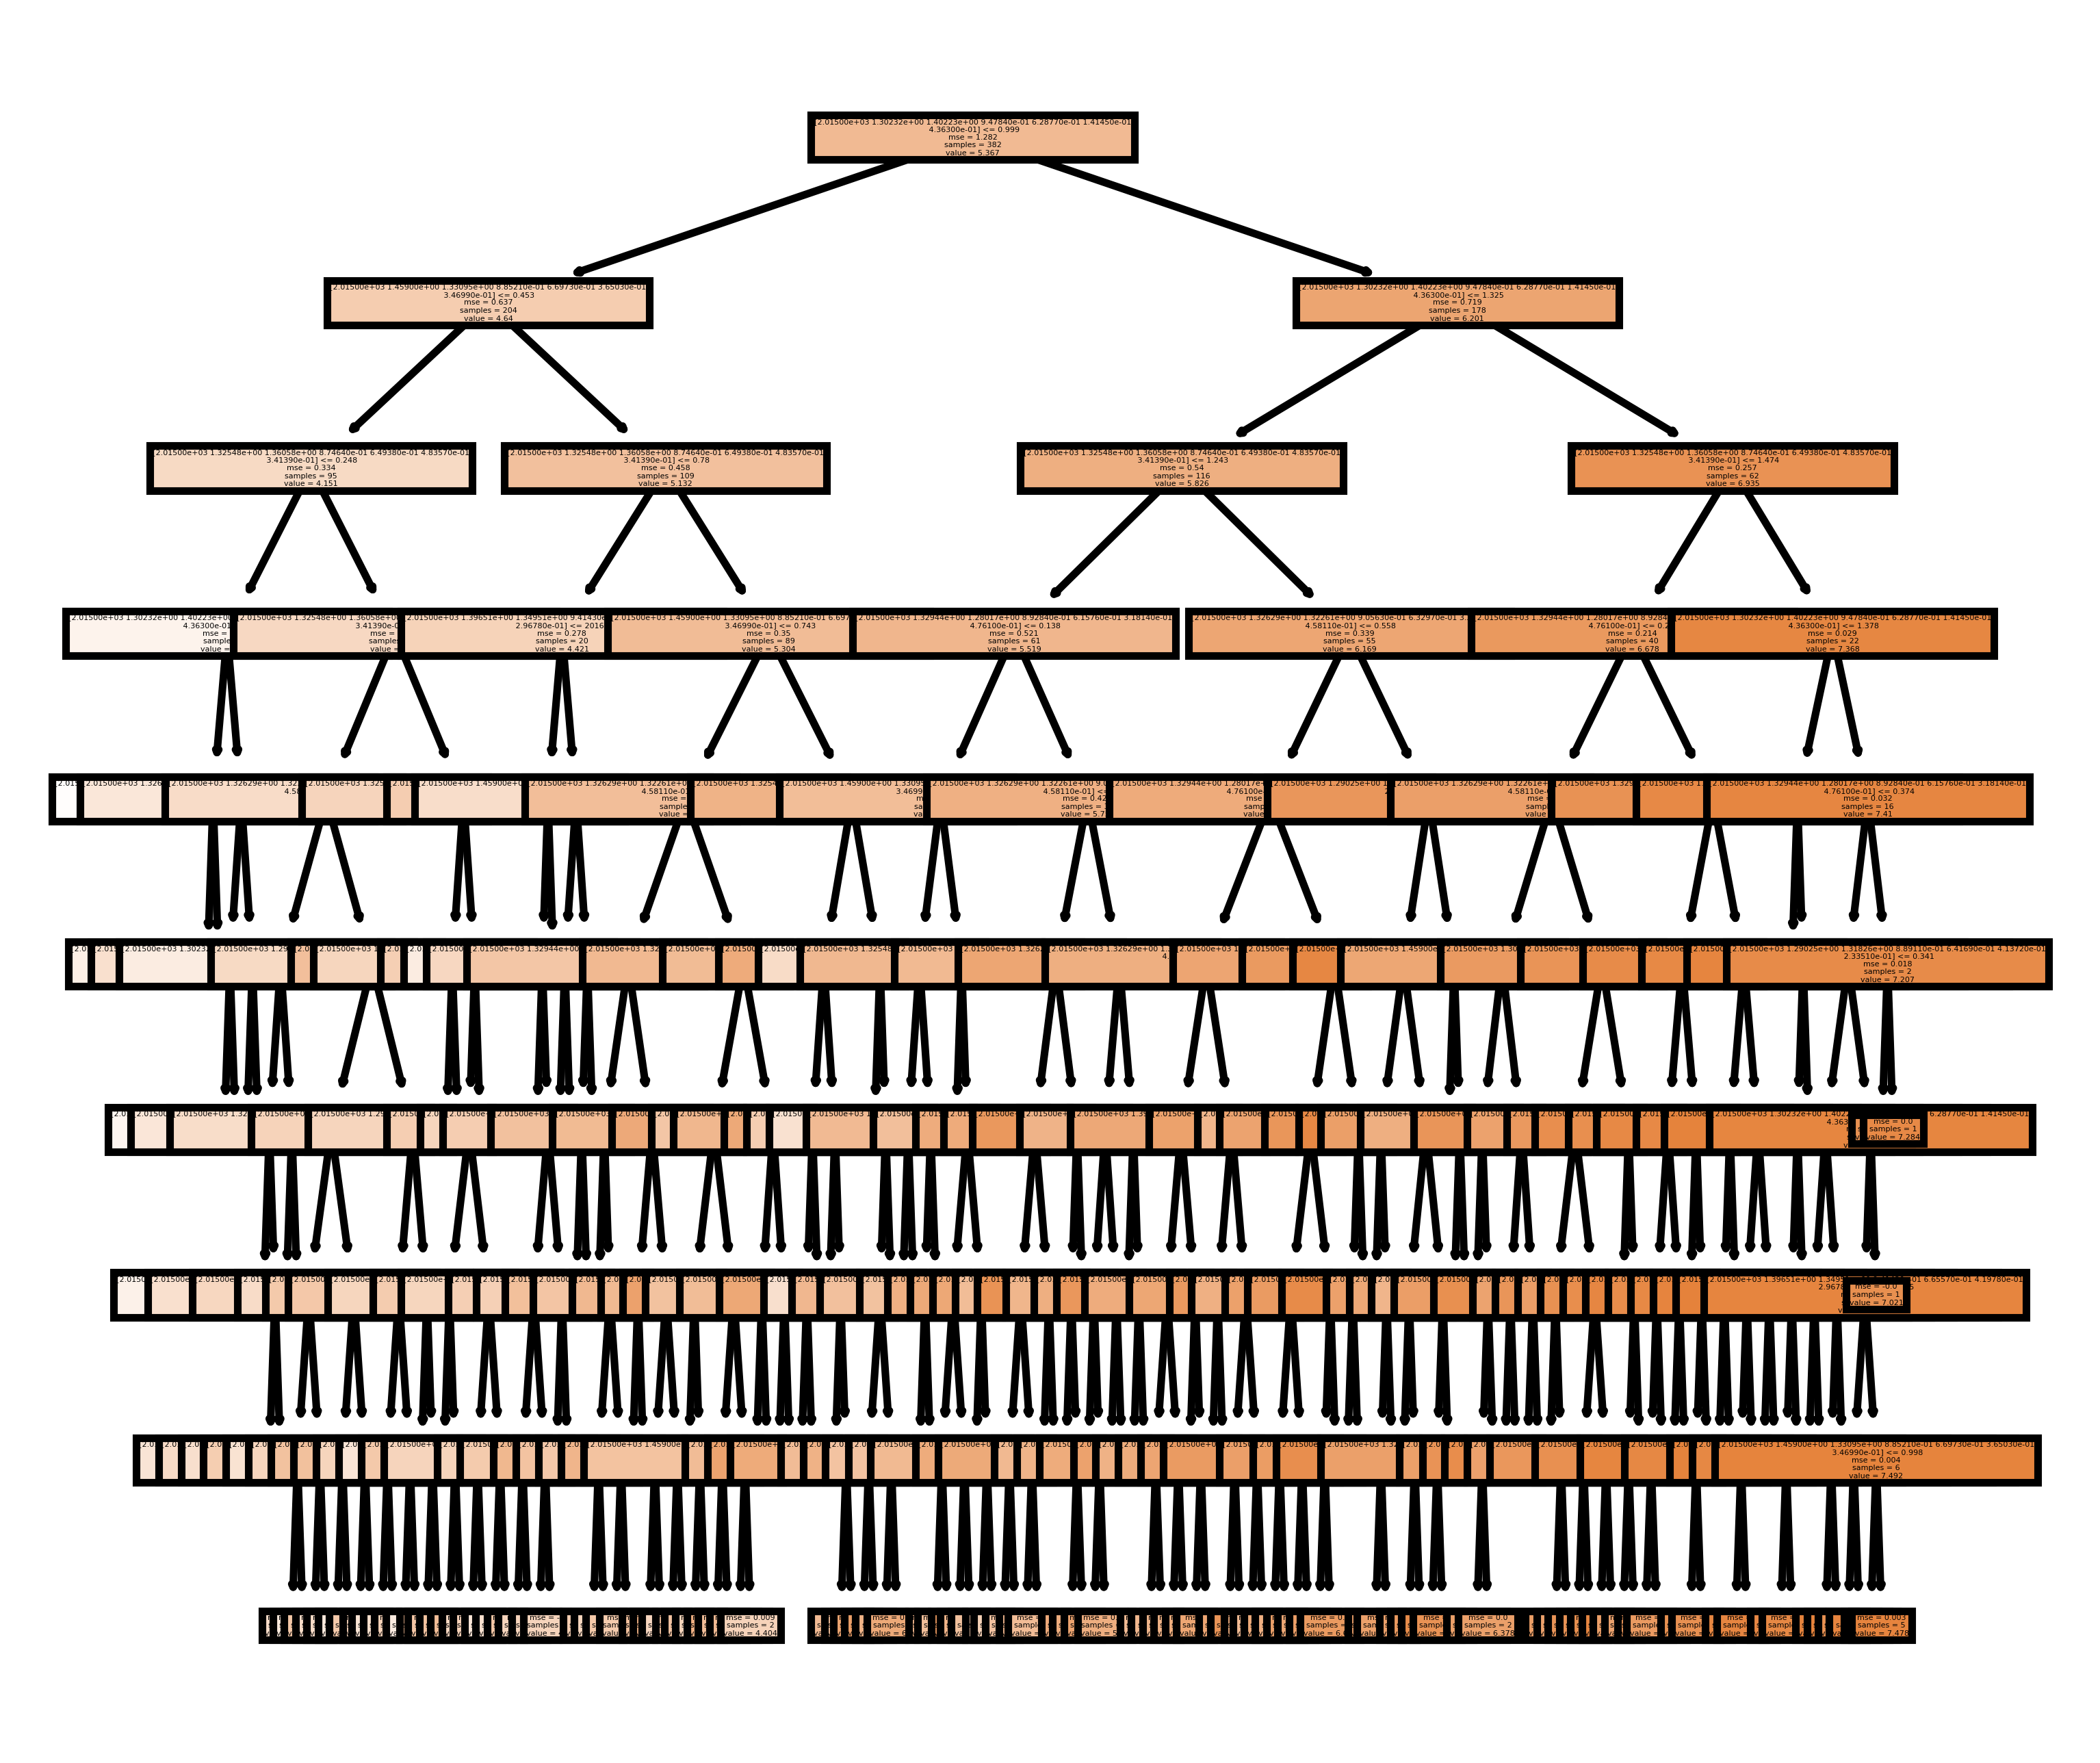

In [ ]:
fig,axes =plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=800)
tree.plot_tree(rf_tuned.estimators_[0],
               feature_names=fn,
               class_names=cn,
               filled=True);

# **Adaboost** 

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
adreg=AdaBoostRegressor(random_state=42)

In [ ]:
adreg.fit(X_train,y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=42)

In [ ]:
print("Model Score:",adreg.score(X_train,y_train)*100)
print("R2 cv Score:",cross_val_score(adreg,X_train,y_train,cv=10,scoring="r2").mean()*100)

Model Score: 79.60734353301366
R2 cv Score: 73.41225978159014


*Adaboost-Model Tuning*

In [ ]:
ada_grid ={'n_estimators':[100,200,500,600,800,1000,2000],
           'learning_rate':[0.001,0.01,0.02,0.03,0.2,0.5]}

In [ ]:
adreg_gridcv = GridSearchCV(adreg,ada_grid,cv=10,n_jobs=-1)

In [ ]:
adreg_gridcv.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=AdaBoostRegressor(base_estimator=None, learning_rate=1.0,
                                         loss='linear', n_estimators=50,
                                         random_state=42),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.02, 0.03, 0.2, 0.5],
                         'n_estimators': [100, 200, 500, 600, 800, 1000, 2000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
adreg_gridcv.best_params_

{'learning_rate': 0.01, 'n_estimators': 2000}

In [ ]:
ada_tuned = AdaBoostRegressor(learning_rate=0.8,n_estimators=1500,random_state=42).fit(X_train,y_train)

In [ ]:
ada_y_pred=ada_tuned.predict(X_test)

In [ ]:
ada_score=ada_tuned.score(X_train,y_train)*100
ada_cv_score= cross_val_score(ada_tuned, X_train, y_train, scoring='r2', cv=10).mean()*100 
ada_test_score = r2_score(y_test,ada_y_pred)*100

In [ ]:
print("Model Score:",ada_tuned.score(X_train,y_train)*100)
print("R2cv:",cross_val_score(ada_tuned, X_train, y_train, scoring='r2', cv=10).mean()*100 )

Model Score: 80.39794694241192
R2cv: 74.47706598313009


# **XGBoost** 

In [ ]:
import xgboost as xgb
from xgboost import XGBRegressor

In [ ]:
xgb_model = XGBRegressor()

In [ ]:
xgb_model.fit(X_train,y_train)

[14:51:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
xgb_model.score(X_train,y_train)

0.901747532218094

*XGB-Model Tuning*

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
#xgb_grid = {
      #  'colsample_bytree': [0.4,0.5,0.6,0.65,0.7, 0.8,0.9, 1.0],
       # 'n_estimators':[100,200,500,600,800,1000],
        # 'max_depth': [2,3, 4, 5,6],
        #'learning_rate':[0.001,0.01,0.02,0.04,0.1,0.5]
        #}

In [ ]:
#xgb_gridcv = GridSearchCV(xgb_model,xgb_grid,cv=10,n_jobs=-1).fit(X_train,y_train)

[11:53:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
xgb_gridcv.best_params_

{'colsample_bytree': 0.9,
 'learning_rate': 0.04,
 'max_depth': 6,
 'n_estimators': 500}

In [ ]:
xgb_tuned = XGBRegressor(max_depth=3,learning_rate=0.025,n_estimators=265,colsample_bytree=0.9).fit(X_train,y_train)

[12:20:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
xgbt_y_pred = xgb_tuned.predict(X_test)

In [ ]:
xgb_score=xgb_tuned.score(X_train,y_train)*100
xgb_cv_score = cross_val_score(xgb_tuned, X_train, y_train, scoring='r2', cv=10).mean()*100
xgb_test_score = r2_score(y_test,xgbt_y_pred)*100

[12:20:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:20:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:20:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:20:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:20:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:20:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:20:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:20:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [ ]:
print("Model Score:",xgb_tuned.score(X_train,y_train)*100)
print("R2 Score-cv:",cross_val_score(xgb_tuned, X_train, y_train, scoring='r2', cv=10).mean()*100)

Model Score: 88.35733210576132
[12:20:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:20:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:20:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:20:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:20:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:20:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:20:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:20:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear i

In [ ]:
xgb_tuned.score(X_train,y_train)

0.8813461470653798

In [ ]:
np.sqrt(mean_squared_error(y_test,xgbt_y_pred))

0.5150474532839475

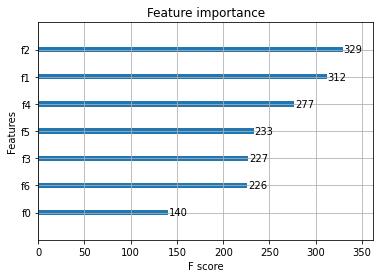

<Figure size 1152x864 with 0 Axes>

In [ ]:
xgb.plot_importance(xgb_tuned)
plt.figure(figsize = (16, 12))
plt.show()

In [ ]:
xgb_tuned.feature_importances_

array([0.02644845, 0.396784  , 0.03964657, 0.40458646, 0.07587826,
       0.03101266, 0.02564357], dtype=float32)

# **Result**

In [ ]:
modelsname = ["Linear Regression","Lasso Regression","Ridge Regression","SVR","Polynomial Regression","Random Forest Regression","AdaBoost","XGBoost"]

mscore=[l_score,lasso_score,rd_score,svr_score,poly_score,rf_score,ada_score,xgb_score]

cvscore = [l_cv_score,lasso_cv_score,rd_cv_score,svr_cv_score,poly_cv_score,rf_cv_score,ada_cv_score,xgb_cv_score]  
test_score=[l_test_score,lasso_test_score,rd_test_score,svr_test_score,poly_test_score,rf_test_score,ada_test_score,xgb_test_score]      

In [ ]:
ttable= list(zip(modelsname,mscore,cvscore,test_score))
mtable=pd.DataFrame(ttable,columns=["Model","Model Score","CV_Score","Test_Score"])

In [ ]:
mtable

Model  Model Score   CV_Score  Test_Score
0         Linear Regression    76.520458  75.247611   81.407888
1          Lasso Regression    76.518854  75.250299   81.451749
2          Ridge Regression    76.508185  75.268109   81.590227
3                       SVR    87.240043  80.925664   88.692713
4     Polynomial Regression    85.683362  75.347160   82.759153
5  Random Forest Regression    85.892220  77.612256   84.200722
6                  AdaBoost    80.397947  74.477066   80.787056
7                   XGBoost    88.357332  79.004866   85.201106